# ENGRI 1120 Discussion 7: Calculation of Activity Coefficients for Binary and Multicomponent Liquid Mixtures

## Introduction
When dealing with binary mixtures, we can use the [Two Suffix Margules models](https://en.wikipedia.org/wiki/Margules_activity_model) to estimate the activity coefficients $\ln\hat{\gamma}_{i}$. The $A_{ij}$ parameters in these models are tabulated in reference books for various mixtures. 

However, in liquid-liquid extraction applications, we have at least three components; solvent 1, solvent 2, and the material dissolved in solvent one that we want to extract. Thus, the tools we developed for binary mixtures, e.g., the two-suffix Margules model, are not applicable. 

To model multicomponent mixtures, let's use another standard model, the Wilson Model, to compute the activity coefficients. However, that there are also other prominent models, such as the [Non-Random Two Liquid (NRTL)](https://en.wikipedia.org/wiki/Non-random_two-liquid_model) models that are also widely used for multicomponent mixtures.

### Multicomponent Wilson Model
The excess Gibbs energy for the Wilson Model is given by the expression:

$$
\frac{G^{E}}{RT} = -\sum_{i\in\mathcal{M}}x_{i}\ln\left(\sum_{j\in\mathcal{M}}x_{j}\Lambda_{ij}\right)
$$

where the interaction term(s) $\Lambda_{ij}$ are given by:

$$
\Lambda_{ij} = \frac{V_{j}}{V_{i}}\exp\left(\frac{-a_{ij}}{RT}\right)
$$

Starting from excess Gibbs energy expression, after some (magical) manipulation, we arrive at an expression for the activity coefficient for component $i$:

$$
\displaystyle{
\ln\hat{\gamma}_{i} = 1 - \ln\left(\sum_{j\in\mathcal{M}}x_{j}\Lambda_{ij}\right) - \sum_{k\in\mathcal{M}}\frac{x_{k}\Lambda_{ki}}{\sum_{j\in\mathcal{M}}x_{j}\Lambda_{kj}}}
$$

where $\Lambda_{ij} = 1$ for $i=j$

## Lab setup
The code block below installs (and loads) [Julia](https://julialang.org) packages that we use to solve the species mass balance equations.

In [1]:
import Pkg; Pkg.activate("."); Pkg.resolve(); Pkg.instantiate();

  Activating project at `~/Desktop/julia_work/ENGRI-1120-IntroToChemE-Example-Notebooks/labs/lab-7-single-lle-seperation`
  No Changes to `~/Desktop/julia_work/ENGRI-1120-IntroToChemE-Example-Notebooks/labs/lab-7-single-lle-seperation/Project.toml`
  No Changes to `~/Desktop/julia_work/ENGRI-1120-IntroToChemE-Example-Notebooks/labs/lab-7-single-lle-seperation/Manifest.toml`


In [2]:
# Load required packages 
using LinearAlgebra
using CSV
using DataFrames
using Plots
using Colors

# setup paths -
const _ROOT = pwd()
const _PATH_TO_DATA = joinpath(_ROOT, "figs");

### Load the Lab 7 code library

In [3]:
include("ENGRI-1120-Lab-7-CodeLib.jl");

## a) Calculations $G^{E}/RT$ and $\gamma$ calculations
The condition to form a stable single-phase binary equilibrium is given by:

$$\frac{d^{2}}{dx_{1}^{2}}\left(\frac{G^{E}}{RT}\right)> -\frac{1}{x_{1}x_{2}}$$

In [4]:
# Build the Λ-matrix for Acetone-Acetonitrile at T = 318.15K
Λ = [1 0.79; 4.1755 1];

# setup composition array -
N = 1000
x₁_array = range(0.0,stop=1.0,length=N) |> collect;

gE_array = Array{Float64,2}(undef, N, 2);
for i ∈ 1:N
    
    x₁ = x₁_array[i]
    x₂ = 1 - x₁
    
    gE_value = compute_gibbs_excess_energy([x₁,x₂], Λ; T = 318.15);
    gE_array[i,1] = x₁
    gE_array[i,2] = gE_value
end

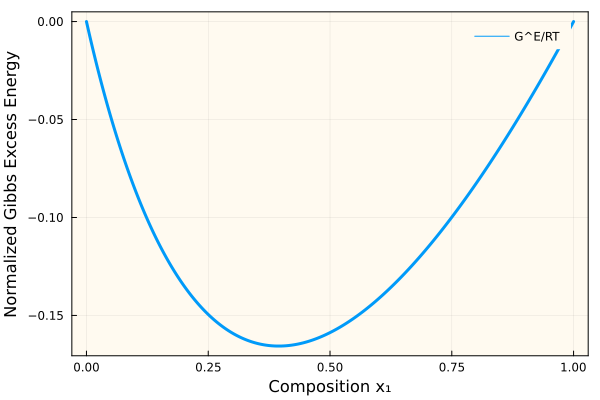

In [5]:
# make a plot -
plot(gE_array[:,1], 1000*gE_array[:,2], legend=:topright, lw=3, bg="floralwhite", background_color_outside="white", framestyle = :box, fg_legend = :transparent, label="G^E/RT")
xlabel!("Composition x₁", fontsize=18)
ylabel!("Normalized Gibbs Excess Energy", Fontsize=18)

In [6]:
# compute the γ values -
gamma_array = Array{Float64,2}(undef, N, 3);
for i ∈ 1:N
    
    x₁ = x₁_array[i]
    x₂ = 1 - x₁    
    
    gamma_array[i,1] = x₁
    gamma_array[i,2] = γ₁([x₁,x₂], Λ);
    gamma_array[i,3] = γ₂([x₁,x₂], Λ);
end

In [7]:
gamma_array

1000×3 Matrix{Float64}:
 0.0         0.0528775  1.0
 0.001001    0.053723   0.999992
 0.002002    0.0545761  0.999968
 0.003003    0.0554368  0.999929
 0.004004    0.056305   0.999875
 0.00500501  0.0571807  0.999805
 0.00600601  0.058064   0.99972
 0.00700701  0.0589548  0.99962
 0.00800801  0.059853   0.999506
 0.00900901  0.0607587  0.999377
 0.01001     0.0616719  0.999234
 0.011011    0.0625926  0.999077
 0.012012    0.0635207  0.998905
 ⋮                      
 0.988989    0.99993    0.299214
 0.98999     0.999942   0.29887
 0.990991    0.999953   0.298526
 0.991992    0.999963   0.298183
 0.992993    0.999972   0.29784
 0.993994    0.999979   0.297498
 0.994995    0.999986   0.297156
 0.995996    0.999991   0.296815
 0.996997    0.999995   0.296475
 0.997998    0.999998   0.296135
 0.998999    0.999999   0.295795
 1.0         1.0        0.295456

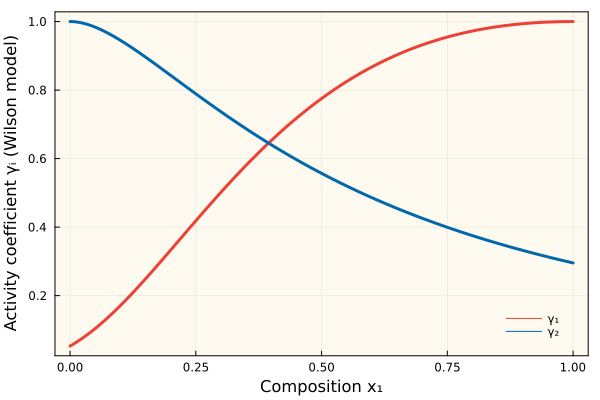

In [8]:
plot(gamma_array[:,1], gamma_array[:,2], legend=:bottomright, lw=3, bg="floralwhite", 
    background_color_outside="white", framestyle = :box, fg_legend = :transparent, 
    label="γ₁", c=colorant"#EF4035")
plot!(gamma_array[:,1], gamma_array[:,3], lw=3, label="γ₂", c=colorant"#0068AC")

xlabel!("Composition x₁", fontsize=18)
ylabel!("Activity coefficient γᵢ (Wilson model)", Fontsize=18)

## b) LLE single-stage mixer example setup

<img src="figs/Fig-LLE-Mixer.png" style="width:35%">

See derivation on the board.